In [1]:
import numpy as np

In [26]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#Reading the csv file
df = pd.read_csv('911.csv')

In [9]:
#Checking the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
#Checking the top 5
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [137]:
#Checking the top 5 zip codes
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [19]:
#Checking top 5 townships
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [20]:
#unique title codes
df['title'].nunique()

110

In [81]:
#In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.
df['Reason']= df['title'].apply(lambda title: title.split(':')[0])

In [82]:
# common Reason for a 911 call
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

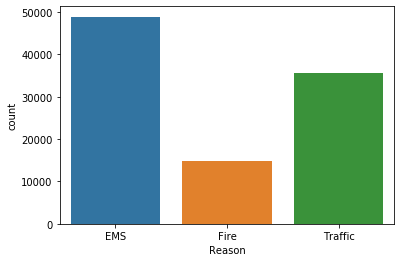

In [83]:
#seaborn to create a countplot of 911 calls by Reason
sns.countplot(x='Reason',data=df)

In [138]:
# data type of the objects in the timeStamp column
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [85]:
#convert the column from strings to DateTime objects
df['timeStamp'] =pd.to_datetime(df['timeStamp'])

In [86]:
#Using Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [87]:
#Creating a dictionary
dmap = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}

In [88]:
df['Day of week'] = df['Day of week'].map(dmap)

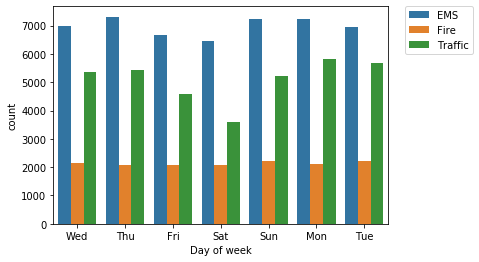

In [90]:
#seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.
sns.countplot(x='Day of week',data=df,hue='Reason')

#Moving legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

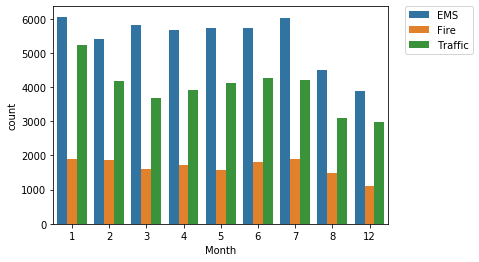

In [93]:
#countplot for month
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [96]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of week,Reason
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


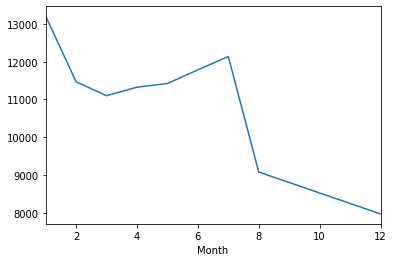

In [98]:
byMonth['desc'].plot()

In [139]:
#Using lmplot-seaborn's lmplot() to create a linear fit on the number of calls per month

sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

TypeError: lmplot() missing 1 required positional argument: 'data'

In [102]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [103]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

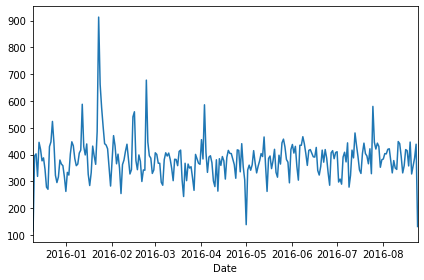

In [105]:
#groupby this Date column with the count() aggregate and create a plot of counts of 911 calls

df.groupby('Date').count()['twp'].plot()

plt.tight_layout()


Text(0.5, 1, 'EMS')

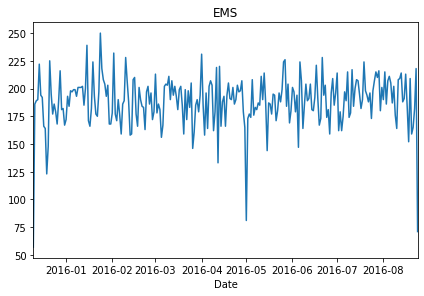

In [142]:
#recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')

Text(0.5, 1, 'Traffic')

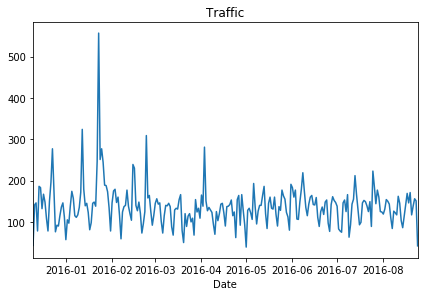

In [141]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1, 'Fire')

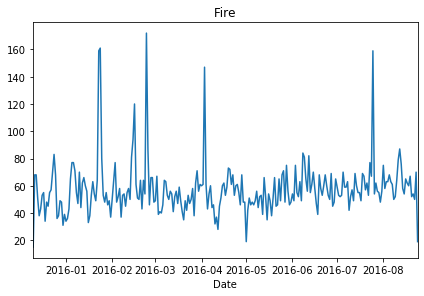

In [117]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

plt.tight_layout()
plt.title('Fire')

In [120]:
# Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this
dayHour = df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()

In [122]:
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Mon,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Sat,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Sun,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Thu,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


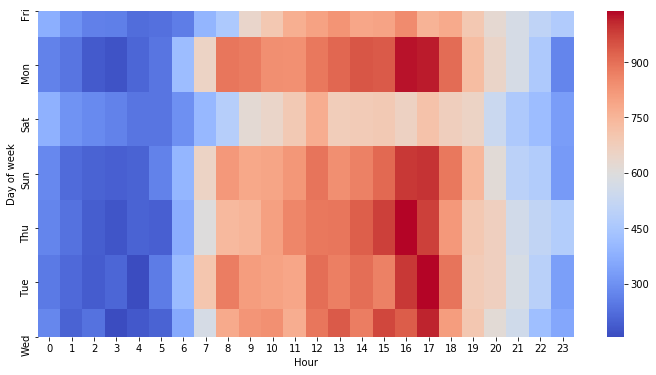

In [126]:
#heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

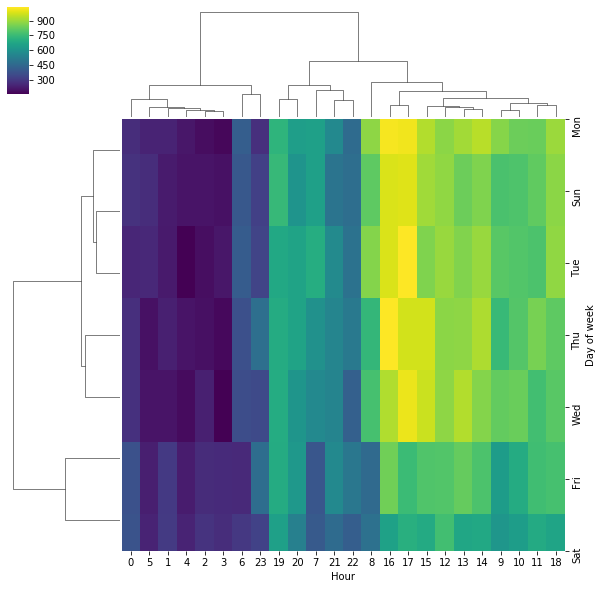

In [130]:
#clustermap
sns.clustermap(dayHour,cmap='viridis')

In [131]:
dayHour2 = df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()

In [132]:
dayHour2.head()

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,2291,1441,1266,1734,1444,1388,1695,1099,978
Mon,1973,1753,1884,1430,1918,1676,1670,1612,1234
Sat,1960,1229,1102,1488,1424,1333,1672,1021,907
Sun,1727,1964,1535,1598,1779,1617,1692,1511,1257
Thu,1970,1581,1525,1958,1730,1649,2045,1310,1065


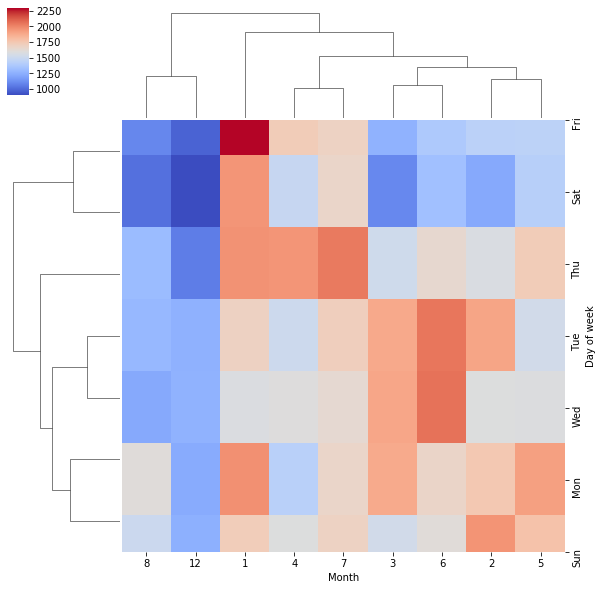

In [134]:
sns.clustermap(dayHour2,cmap='coolwarm')

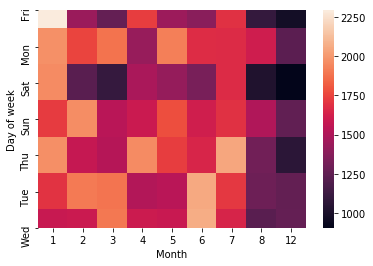

In [135]:
sns.heatmap(dayHour2)